## Waste Management Using CNN  

In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# pip install tersorflow

In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import cv2

from tqdm import tqdm

import warnings

warnings.filterwarnings('ignore')

In [4]:
train_path = "dataset/TRAIN" 

test_path = "dataset/TEST"


In [5]:
#import libraries
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from tensorflow.keras.utils import plot_model

from glob import glob

In [6]:
#visualization

x_data = []

y_data = []

for category in glob(train_path+"/*"):

    for file in tqdm(glob(category+"/*")):

        img_array = cv2.imread(file)

        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        
        x_data.append(img_array)

        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})



100%|██████████| 9999/9999 [02:21<00:00, 70.50it/s]


In [7]:
data.shape

(22564, 2)

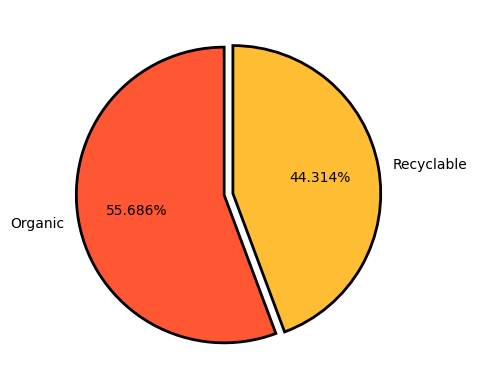

In [14]:
colors = ["#ff5733", "#ffbd33"]
plt.pie(
    data.label.value_counts(),
    labels=["Organic","Recyclable"],
    autopct='%0.3f%%',
    colors=colors[:2],
    startangle=90,
    explode=[0.03,0.03],
    wedgeprops={'edgecolor':'black','linewidth':2}
)
plt.show()

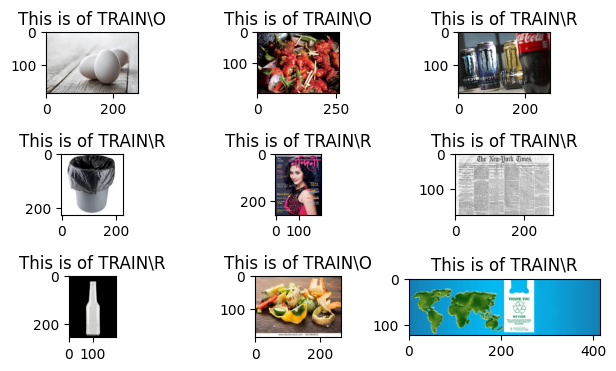

In [15]:
plt.Figure(figsize=(20, 15)) 
for i in range(9):
    plt.subplot(4, 3, i%12+1)
    index = np.random.randint(20000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


## CNN - Conventional Neural Network 

In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
batch_size = 256

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [22]:
hist=model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

Epoch 1/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 486s 5s/step - accuracy: 0.8252 - loss: 0.4263 - val_accuracy: 0.8802 - val_loss: 0.3457
Epoch 2/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 442s 5s/step - accuracy: 0.8441 - loss: 0.3814 - val_accuracy: 0.8949 - val_loss: 0.2913
Epoch 3/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 443s 5s/step - accuracy: 0.8611 - loss: 0.3420 - val_accuracy: 0.8392 - val_loss: 0.3544
Epoch 4/15
89/89 ━━━━━━━━━━━━━━━━━━━━ 437s 5s/step - accuracy: 0.8682 - loss: 0.3257 - val_accuracy: 0.8834 - val_loss: 0.2874
Epoch 5/15


KeyboardInterrupt: 